In [12]:
# Bokeh Testing
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [124]:
import numpy as np
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show
from bokeh.models import CustomJS, Slider, ColumnDataSource, HoverTool
from bokeh.layouts import row, column
from bokeh.events import PlotEvent

from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [99]:
A = np.random.randint(0, 255, size = (100,10, 10));

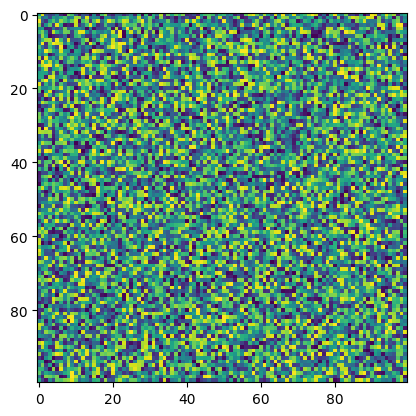

In [5]:
plt.imshow(A)

In [11]:
p = figure(tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])
p.x_range.range_padding = p.y_range.range_padding = 0

# must give a vector of image data for image parameter
p.image(image=[A], x=0, y=0, dw=10, dh=10, palette="Greys256", level="image")
p.grid.grid_line_width = 0.5

show(p)

In [18]:
import numpy as np

from bokeh.plotting import figure, show
from bokeh.models import CustomJS, Slider, ColumnDataSource
from bokeh.layouts import row, column

def visualize_3Darray(A):
    source = ColumnDataSource(data=dict(image=[A[0, :, :]]))
    x0, y0 = source.data['image'][0].shape
    p = figure(tooltips=[("x", "$x{0.}"), ("y", "$y{0.}"), ("value", "@image")])
    p.image(image='image', x=0, y=0, dw=x0, dh=y0, source=source, palette="Viridis256")
    slider = Slider(start=0, end=(len(A) - 1), value=0, step=1, title="SliceNumber")
    code= """
        source.data = {
        image : [array[n.value]]
        }
    """
    callback = CustomJS(args=dict(source=source, n=slider, array = A), code = code)
    slider.js_on_change('value', callback);
    layout = column(slider, p)
    return layout

def visualize_image(img_):
    source = ColumnDataSource(data=dict(image=[img_]))
    x0, y0 = source.data['image'][0].shape
    p = figure(tooltips=[("x", "$x{0.}"), ("y", "$y{0.}"), ("value", "@image")])
    p.image(image='image', x=0, y=0, dw=x0, dh=y0, source=source, palette="Viridis256")
    return p

In [2]:
A = np.load('err.npy')
A = np.array([np.flipud(img) for img in A])
layout = visualize_3Darray(A);
show(layout)

In [ ]:
# callback_slider_timer = CustomJS(args=dict(n=slider),
#                     code="""
#     n.value = (n.value + 1) % 100;
#     console.log(n.value);
# """)
# p.js_on_event(MouseMove, callback_slider_timer)
# p.add_tools(HoverTool(tooltips=None, callback=callback_slider_timer))

In [19]:
p = visualize_image(A[0])
show(p)